# アタポン
* アタポンのデータに絞る
* とりあえずpystan動かしてみる
  * 試しにローカルレベルモデルで動かす

## インポート

In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=['IPAMincho'])

import pystan

## イベントデータ読み込み

In [2]:
input_dir = '../event_data/'

In [3]:
df = pd.read_pickle(input_dir + 'a3_output_df.pkl')
df = df[df['形式'] == 'アタポン'].reset_index(drop=True)
df

,イベント,2001位,形式,日付,属性,期間
0,アタシポンコツアンドロイド,78330,アタポン,2015-09-25,NaN,249.0
1,Nation Blue,67627,アタポン,2015-10-19,NaN,198.0
2,Orange Sapphire,42944,アタポン,2015-11-20,NaN,150.0
3,Snow Wings,50954,アタポン,2015-12-18,NaN,222.0
4,パステルピンクな恋,43854,アタポン,2016-01-20,NaN,174.0
5,オルゴールの小箱,56737,アタポン,2016-02-18,NaN,174.0
6,絶対特権主張しますっ！,51353,アタポン,2016-03-20,NaN,174.0
7,つぼみ,47907,アタポン,2016-04-19,NaN,174.0
8,明日また会えるよね,58517,アタポン,2016-05-19,NaN,198.0
9,咲いてJewel,77930,アタポン,2016-06-20,NaN,174.0


## 時系列データ準備
元データは日付の間隔がバラバラなので、等間隔にする

In [4]:
# 週データ（直前の月曜）追加
# 月ごとだとイベント被る、日ごとだと細かすぎるため
df['week'] = df['日付'].apply(lambda x: x - datetime.timedelta(days=x.weekday()))

In [5]:
print('最初', df['week'].min())
print('最後', df['week'].max())

最初 2015-09-21
最後 2020-08-17


In [6]:
# 開始日から終了日までの全日付が入ったリスト作る
start_dt = df['week'].min()
end_dt = df['week'].max()
# 日付差の週数を算出（リストに最終日も含めたいので、＋１しています）
weeks_num = (end_dt - start_dt).days // 7 + 1
# リスト作成
datelist = [start_dt + 7*timedelta(days=x) for x in range(weeks_num)]
print('日数', len(datelist))
print('開始日', datelist[0])
print('終了日', datelist[-1])

日数 257
開始日 2015-09-21
終了日 2020-08-17


In [7]:
# 全週にイベントデータ結合
df_all = pd.DataFrame({'week': datelist})
df_all = pd.merge(df_all, df, how='left', on='week')
df_all

,week,イベント,2001位,形式,日付,属性,期間
0,2015-09-21,アタシポンコツアンドロイド,78330.0,アタポン,2015-09-25,NaN,249.0
1,2015-09-28,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-10-05,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-10-12,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-10-19,Nation Blue,67627.0,アタポン,2015-10-19,NaN,198.0
...,...,...,...,...,...,...,...
252,2020-07-20,太陽の絵の具箱,107142.0,アタポン,2020-07-20,NaN,174.0
253,2020-07-27,NaN,NaN,NaN,NaN,NaN,NaN
254,2020-08-03,NaN,NaN,NaN,NaN,NaN,NaN
255,2020-08-10,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# 使い回せるので保存
save_dir = '../event_data'
df_all.to_pickle(save_dir + '/b1_output_df.pkl')

## stanデータ準備

In [10]:
# 欠損でない位置のindex番号+1
# stanは0ではなく1スタートなので+1してる
obs_no = list(map(lambda x: x+1, df_all[(~(df_all['2001位'].isnull()))].index.tolist()))

In [12]:
# データ（辞書型）
dat = {
    'T':       len(datelist),         # 全日付の日数
    'len_obs': len(df),               # データがある日付の日数
    'y':       df['2001位'].tolist(), # 観測値
    'obs_no':  obs_no,                # 観測値がある場所（あったらTrue、欠損だとFalse）
}

In [13]:
# Stanコード
model = """
data {
  int T;                   // データ取得期間の長さ
  int len_obs;             // 観測値が得られた個数
  vector[len_obs] y;       // 観測値
  int obs_no[len_obs];     // 観測値が得られた時点
}
parameters {
  vector[T] mu;
  real<lower=0> s_w;
  real<lower=0> s_v;
}
model {
  for(i in 2:T){
    mu[i] ~ normal(mu[i-1], s_w);
  }
  for(i in 1:len_obs){
    y[i] ~ normal(mu[obs_no[i]], s_v);
  }
}
"""

# Stan実行

In [14]:
# コンパイル
%time stm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5ba8a52cb7c154bf6cc6e08b79667e8e NOW.
C:\Users\kazuy\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\kazuy\AppData\Local\Temp\tmp5lsaqe72\stanfit4anon_model_5ba8a52cb7c154bf6cc6e08b79667e8e_7281873922265192040.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Wall time: 23.8 s


In [15]:
# パラメータ設定
n_itr = 10000
n_warmup = 9000
chains = 3

In [16]:
# 計算
%time fit = stm.sampling(data=dat, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False)

Wall time: 1min 28s


In [17]:
fit

Inference for Stan model: anon_model_5ba8a52cb7c154bf6cc6e08b79667e8e.
3 chains, each with iter=10000; warmup=9000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]    6.4e4  678.49  1.6e4  3.0e4  5.3e4  6.4e4  7.5e4  9.4e4    573   1.01
mu[1]    6.4e4  692.16  1.6e4  3.0e4  5.4e4  6.4e4  7.5e4  9.4e4    534   1.01
mu[2]    6.4e4  698.53  1.6e4  3.1e4  5.4e4  6.4e4  7.4e4  9.3e4    504   1.01
mu[3]    6.3e4  670.58  1.5e4  3.1e4  5.4e4  6.4e4  7.4e4  9.2e4    532   1.01
mu[4]    6.3e4  927.75  1.5e4  3.2e4  5.4e4  6.4e4  7.4e4  9.1e4    267   1.02
mu[5]    6.3e4  711.12  1.5e4  3.1e4  5.3e4  6.4e4  7.3e4  9.2e4    459   1.02
mu[6]    6.3e4  1115.2  1.5e4  3.2e4  5.3e4  6.4e4  7.3e4  9.0e4    181   1.02
mu[7]    6.3e4  1186.1  1.5e4  3.2e4  5.3e4  6.3e4  7.3e4  9.0e4    159   1.02
mu[8]    6.2e4  1536.0  1.5e4  3.2e4  5.2e4  6.3e4  7.3e4  9.0e4     93   1.03
mu[9]    6.2e4  1582

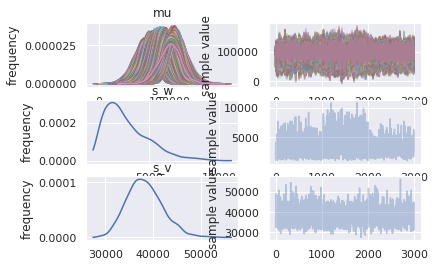

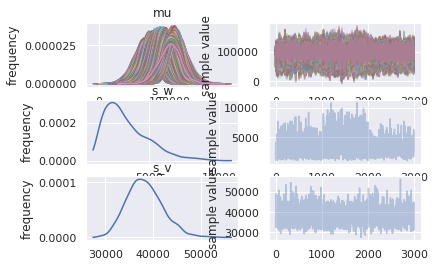

In [18]:
fit.plot()

In [21]:
#結果を抽出
ms = fit.extract() 

#muの事後平均を算出
mu_mean = ms['mu'].mean(axis=0)

# #広告効果の回帰係数の事後平均を算出
# beta_mean = ms['beta'].mean(axis=0)

# #広告効果を算出
# ad_effects = beta_mean*data.dummy_ad

#95パーセンタイルを抽出
mu_5 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 5), axis=0))
mu_95 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 95), axis=0))

# beta_5 = np.array(pd.DataFrame(ms['beta']).apply(lambda x: np.percentile(x, 5), axis=0))
# beta_95 = np.array(pd.DataFrame(ms['beta']).apply(lambda x: np.percentile(x, 95), axis=0))
# ad_effects5 = beta_5*data.dummy_ad
# ad_effects95 = beta_95*data.dummy_ad

#x軸
X = df.week
X_all = df_all.week

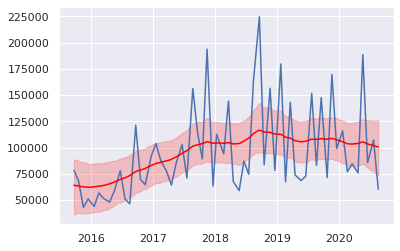

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['2001位'], label='observed')
# ax.plot(X, mu, label='true trend', c='green')
ax.plot(X_all, mu_mean, label='predicted trend', c='red')
plt.fill_between(X_all, mu_5, mu_95, color='red', alpha=0.2)
# plt.legend(loc='upper left', borderaxespad=0, fontsize=15)
plt.show()

全然当たっていないが、とりあえず中心あたりは通ってる気がする